In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Load Data

data= pd.read_csv(r"Text_Preprocessing.csv")

In [ ]:
data

,Unnamed: 0,tweet,klasifikasi,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed
0,0,pemerintah lampung bantuan mahasiswa derasnya ...,negative,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...",<FreqDist with 12 samples and 14 outcomes>,"['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['pemerintah', 'lampung', 'bantuan', 'mahasisw...","['perintah', 'lampung', 'bantu', 'mahasiswa', ..."
1,1,pemerintah menerapkan herd immunity kemampuan ...,negative,"['pemerintah', 'menerapkan', 'herd', 'immunity...",<FreqDist with 18 samples and 19 outcomes>,"['pemerintah', 'menerapkan', 'herd', 'immunity...","['pemerintah', 'menerapkan', 'herd', 'immunity...","['perintah', 'terap', 'herd', 'immunity', 'mam..."
2,2,lakukan makanan berbuka sahur kepala keluarga ...,positive,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...",<FreqDist with 20 samples and 20 outcomes>,"['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['lakukan', 'makanan', 'berbuka', 'sahur', 'ke...","['laku', 'makan', 'buka', 'sahur', 'kepala', '..."
3,3,warga positif corona bupati kondisi menuntut k...,positive,"['warga', 'positif', 'corona', 'bupati', 'kond...",<FreqDist with 21 samples and 23 outcomes>,"['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond...","['warga', 'positif', 'corona', 'bupati', 'kond..."
4,4,emosi banget kondisi disuruh liputan covid dos...,negative,"['emosi', 'banget', 'kondisi', 'disuruh', 'lip...",<FreqDist with 13 samples and 15 outcomes>,"['emosi', 'banget', 'kondisi', 'disuruh', 'lip...","['emosi', 'banget', 'kondisi', 'disuruh', 'lip...","['emosi', 'banget', 'kondisi', 'suruh', 'liput..."
...,...,...,...,...,...,...,...,...
36917,36917,hoaks hoaks beredar covid pemerintah mengendal...,positive,"['hoaks', 'hoaks', 'beredar', 'covid', 'pemeri...",<FreqDist with 12 samples and 13 outcomes>,"['hoaks', 'hoaks', 'beredar', 'covid', 'pemeri...","['hoaks', 'hoaks', 'beredar', 'covid', 'pemeri...","['hoaks', 'hoaks', 'edar', 'covid', 'perintah'..."
36918,36918,tingginya covid majelis permusyawaratan rakyat...,positive,"['tingginya', 'covid', 'majelis', 'permusyawar...",<FreqDist with 11 samples and 12 outcomes>,"['tingginya', 'covid', 'majelis', 'permusyawar...","['tingginya', 'covid', 'majelis', 'permusyawar...","['tinggi', 'covid', 'majelis', 'musyawarat', '..."
36919,36919,pakai masker cuci hand sanitizer namanya idiot...,negative,"['pakai', 'masker', 'cuci', 'hand', 'sanitizer...",<FreqDist with 14 samples and 14 outcomes>,"['pakai', 'masker', 'cuci', 'hand', 'sanitizer...","['pakai', 'masker', 'cuci', 'hand', 'sanitizer...","['pakai', 'masker', 'cuci', 'hand', 'sanitizer..."
36920,36920,kabupaten aceh selatan zona hijau terlibat pem...,negative,"['kabupaten', 'aceh', 'selatan', 'zona', 'hija...",<FreqDist with 15 samples and 17 outcomes>,"['kabupaten', 'aceh', 'selatan', 'zona', 'hija...","['kabupaten', 'aceh', 'selatan', 'zona', 'hija...","['kabupaten', 'aceh', 'selatan', 'zona', 'hija..."


In [ ]:
data = pd.read_csv('Text_Preprocessing.csv',encoding='utf-8',error_bad_lines=False)
data.klasifikasi.replace(['negative','positive'],[0,1],inplace=True)

In [ ]:
X=data.tweet_tokens_stemmed
y=data.klasifikasi

In [ ]:
# Taking 95% of the dataset into training data and 5% to test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)
print(X_train)

10949    ['kayak', 'orang', 'dua', 'pasang', 'cocokpeme...
29505    ['kali', 'isu', 'cuat', 'perintah', 'kerja', '...
25998    ['dosen', 'fakultas', 'ilmu', 'sosial', 'ilmu'...
20602    ['mayoritas', 'publik', 'kecewa', 'berat', 'ta...
35751    ['metrohariini', 'patung', 'liberty', 'new', '...
                               ...                        
4041     ['perintah', 'umum', 'tambah', 'positif', 'vir...
22220    ['mending', 'media', 'influencers', 'perintah'...
31553    ['individu', 'serah', 'kena', 'covid', 'jatuh'...
35229    ['halo', 'guys', 'kentaki', 'fried', 'chicken'...
18431    ['perintah', 'gagap', 'atas', 'covid', 'orang'...
Name: tweet_tokens_stemmed, Length: 35075, dtype: object


In [ ]:
print(y_train)

10949    1
29505    0
25998    1
20602    0
35751    1
        ..
4041     1
22220    1
31553    0
35229    0
18431    0
Name: klasifikasi, Length: 35075, dtype: int64


In [ ]:
print(X_test)

12678    ['perintah', 'sigap', 'rakyat', 'remeh', 'taat...
13682    ['habib', 'jaga', 'ketat', 'takut', 'nusa', 'k...
20660    ['nehemia', 'lawalata', 'perintah', 'patut', '...
2809     ['muhadjir', 'effendy', 'perintah', 'optimisti...
9320     ['stopmudikcegahcovid', 'bantu', 'perintah', '...
                               ...                        
27814    ['tim', 'ahli', 'medis', 'tiongkok', 'kirim', ...
23440    ['sebab', 'rupiah', 'kuat', 'faktor', 'interna...
12373    ['apresiasi', 'khusus', 'perintah', 'martir', ...
34997    ['pers', 'polisi', 'sektor', 'kerumutan', 'imb...
8969     ['posko', 'adu', 'daring', 'covid', 'ombudsman...
Name: tweet_tokens_stemmed, Length: 1847, dtype: object


In [ ]:
print(y_test)

12678    0
13682    0
20660    0
2809     0
9320     0
        ..
27814    1
23440    1
12373    1
34997    1
8969     0
Name: klasifikasi, Length: 1847, dtype: int64


In [ ]:
# Refer the following for TfidfVectorizer function 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  233636


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['negative','positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      1068
           1       0.88      0.51      0.65       779

    accuracy                           0.76      1847
   macro avg       0.80      0.73      0.74      1847
weighted avg       0.79      0.76      0.75      1847



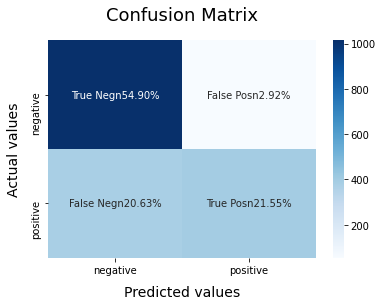

In [ ]:
# Bernoulli Naive Byes Classification and model evaluation
from sklearn.naive_bayes import BernoulliNB 
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1068
           1       0.83      0.78      0.81       779

    accuracy                           0.84      1847
   macro avg       0.84      0.83      0.84      1847
weighted avg       0.84      0.84      0.84      1847



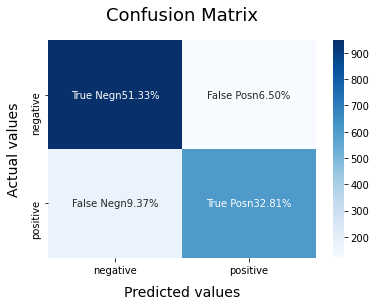

In [ ]:
# Support Vector Machine Classification and model evaluation
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

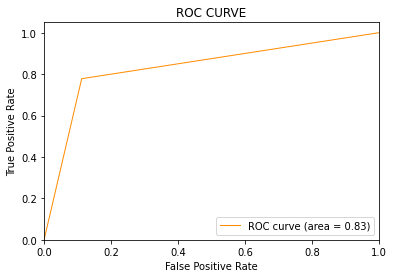

In [ ]:
# ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()